# Exploratory Data Analysis

## Import libraries

In [63]:
import pandas as pd
import openpyxl
from matplotlib import pyplot as plt
import spacy
import seaborn as sns
import altair as alt
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [41]:
# !python -m spacy download en_core_web_md

## Read in excel file to pandas

In [15]:
api_df = pd.read_excel("../data/raw/RiskClassification_Data_Endpoints_V1.xlsx", "Core_Endpoint",
                      usecols = "A:R")
api_df.rename(columns={'security_test_result (FALSE=Passed; TRUE=Failed)': 'security_test_result'}, inplace=True)
api_df.head()

api_endpoint_id  api_id  api_vendor_id api_vendor                  api  \
0             2410    1045            361    OneLook  Datamuse Dictionary   
1             2410    1045            361    OneLook  Datamuse Dictionary   
2             2410    1045            361    OneLook  Datamuse Dictionary   
3             2410    1045            361    OneLook  Datamuse Dictionary   
4             2410    1045            361    OneLook  Datamuse Dictionary   

               category usage_base sample_response                     tagset  \
0  Research & Education       free             NaN  tags,score,word,word,word   
1  Research & Education       free             NaN  tags,score,word,word,word   
2  Research & Education       free             NaN  tags,score,word,word,word   
3  Research & Education       free             NaN  tags,score,word,word,word   
4  Research & Education       free             NaN  tags,score,word,word,word   

  authentication security_test_category  security_test_result server_location  \
0           none  Broken Authentication                   0.0   United States   
1           none  Broken Authentication                   0.0   United States   
2           none   Cross-Site Scripting                   0.0   United States   
3           none   Cross-Site Scripting                   0.0   United States   
4           none   Cross-Site Scripting                   0.0   United States   

        hosting_isp                                        server_name  \
0  Amazon.com, Inc.  Apache/2.4.33 (Amazon) mod_wsgi/3.5 Python/2.7...   
1  Amazon.com, Inc.                               Unavailable/Obscured   
2  Amazon.com, Inc.  Apache/2.4.33 (Amazon) mod_wsgi/3.5 Python/2.7...   
3  Amazon.com, Inc.  Apache/2.4.33 (Amazon) mod_wsgi/3.5 Python/2.7...   
4  Amazon.com, Inc.                               Unavailable/Obscured   

                                   response_metadata hosting city  \
0  {"Date": "Fri, 08 Nov 2019 14:43:17 GMT", "Var...      Ashburn   
1  {"Date": "Fri, 08 Nov 2019 14:43:17 GMT", "Var...      Ashburn   
2  {"Date": "Fri, 08 Nov 2019 14:43:18 GMT", "Var...      Ashburn   
3                                                NaN      Ashburn   
4  {"Date": "Fri, 08 Nov 2019 14:43:18 GMT", "Var...      Ashburn   

  risk_label_Baljeet  
0                Low  
1                 No  
2                Low  
3                Low  
4                 No

## Class Imbalance

In [3]:
api_df.groupby('risk_label_Baljeet').size()

risk_label_Baljeet
High       682
Low       1211
Medium      52
No          55
dtype: int64

## Class Imbalance by Unique API Endpoint

In [4]:
api_df.groupby(['api_endpoint_id', 'risk_label_Baljeet', ]).size()

api_endpoint_id  risk_label_Baljeet
2410             Low                     8
                 No                      8
2524             Low                     1
2532             Low                     1
2544             High                    4
                 Low                    16
2545             Low                    60
2546             Low                     9
2548             Low                     2
2583             Low                     4
2585             High                   16
                 Low                    18
2600             Low                    16
2601             Low                    10
                 Medium                  3
2612             Low                     2
                 No                     46
2628             Low                    30
2677             Low                    14
                 Medium                  5
2681             Low                    21
                 Medium                  1
2687             L

## Class Imbalance by Unique API 

In [5]:
api_df.groupby(['api_id']).size()

api_id
1045     16
1116      2
1125      1
1126      1
1130     34
1132     20
1133     60
1134      9
1150      4
1158     13
1159     16
1169     48
1177     30
1203     19
1206     22
1211    175
1220     10
1224    158
1237    229
1239      2
1256    291
1260      1
1280    574
1286    265
dtype: int64

In [6]:
api_df.groupby(['api_id', 'risk_label_Baljeet', ]).size()

api_id  risk_label_Baljeet
1045    Low                     8
        No                      8
1116    Low                     2
1125    Low                     1
1126    Low                     1
1130    High                   16
        Low                    18
1132    High                    4
        Low                    16
1133    Low                    60
1134    Low                     9
1150    Low                     4
1158    Low                    10
        Medium                  3
1159    Low                    16
1169    Low                     2
        No                     46
1177    Low                    30
1203    Low                    14
        Medium                  5
1206    Low                    21
        Medium                  1
1211    Low                   168
        Medium                  7
1220    Low                    10
1224    High                   90
        Low                    52
        Medium                 16
1237    Low          

Among the APIs and their endpoints, there are high proportions of risk labels in certain API (e.g. api_id: 1280, 1211)

## Specify Numerical and Categorical Columns

In [11]:
categorical_features = list(
    api_df.drop(
        columns=(
            [
                "response_metadata",
                "server_name",
                "security_test_result (FALSE=Passed; TRUE=Failed)",
                "risk_label_Baljeet",
            ]
        )
    ).columns
)
categorical_features

['api_endpoint_id',
 'api_id',
 'api_vendor_id',
 'api_vendor',
 'api',
 'category',
 'usage_base',
 'sample_response',
 'tagset',
 'authentication',
 'security_test_category',
 'server_location',
 'hosting_isp',
 'hosting city']

<AxesSubplot:xlabel='security_test_category', ylabel='count'>

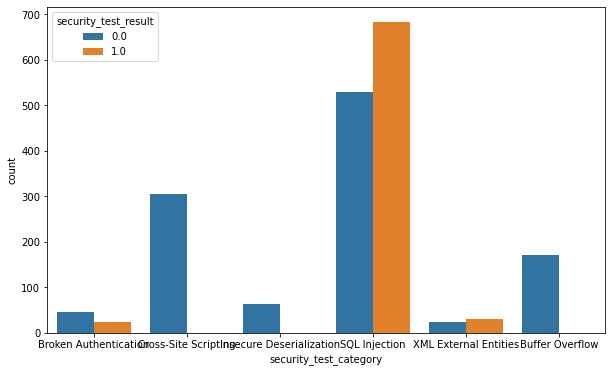

In [64]:
plt.figure(figsize=(10,6))
sns.countplot(x="security_test_category", data=api_df, hue="security_test_result")

## Security Test versus Risk Label

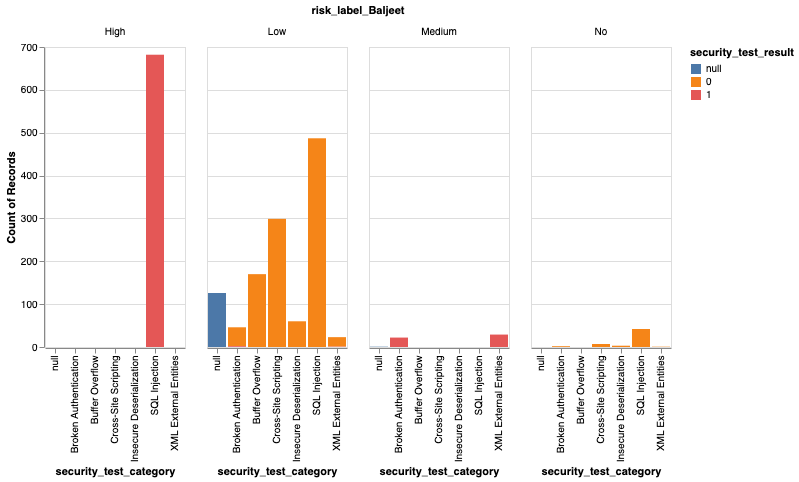

In [59]:
alt.Chart(api_df).mark_bar().encode(
    x=alt.X("security_test_category", type="nominal"),
    color=alt.Color("security_test_result", type="nominal"),
    y="count()"
).facet('risk_label_Baljeet')

In [ ]:
api_df[]'risk_label_Baljeet', ]).size()

## Spacy NER

In [49]:
import IPython
from IPython.display import HTML, display
from spacy import displacy

In [51]:
nlp = spacy.load("en_core_web_md")
text = """{"response": {"data": [{"id": 1, "email": "george.bluth@reqres.in", "avatar": "https://reqres.in/img/faces/1-image.jpg", "last_name": "Bluth", "first_name": "George"}, {"id": 2, "email": "janet.weaver@reqres.in", "avatar": "https://reqres.in/img/faces/2-image.jpg", "last_name": "Weaver", "first_name": "Janet"}, {"id": 3, "email": "emma.wong@reqres.in", "avatar": "https://reqres.in/img/faces/3-image.jpg", "last_name": "Wong", "first_name": "Emma"}, {"id": 4, "email": "eve.holt@reqres.in", "avatar": "https://reqres.in/img/faces/4-image.jpg", "last_name": "Holt", "first_name": "Eve"}, {"id": 5, "email": "charles.morris@reqres.in", "avatar": "https://reqres.in/img/faces/5-image.jpg", "last_name": "Morris", "first_name": "Charles"}, {"id": 6, "email": "tracey.ramos@reqres.in", "avatar": "https://reqres.in/img/faces/6-image.jpg", "last_name": "Ramos", "first_name": "Tracey"}], "page": 1, "total": 12, "support": {"url": "https://reqres.in/#support-heading", "text": "To keep ReqRes free, contributions towards server costs are appreciated!"}, "per_page": 6, "total_pages": 2}}"""


doc = nlp(text)
displacy.render(doc, style="ent")

## 